# In Class Activity - Spotify Database - SQL Practice

Instructor: Melissa Laurino</br>
Spring 2025</br>

Name: Niyati Parekh 
</br>
Date: 02/20/2025
<br>
<br>

In [7]:
# Load necessary packages:
from sqlalchemy import create_engine, inspect, text # Database navigation
import sqlite3 # A second option for working with databases
import pandas as pd # Python data manilpulation

In [9]:
# Set working directory (If needed)
import os
os.chdir(r"C:\Users\parni\OneDrive\Desktop\DSSA\DGW")

In [128]:
# Create a SQLite database and engine
#names the datebase to db_file
db_file = "spotify_data.db" 
#connects Python to SQLite datebase allowing to run queries 
engine = create_engine(f"sqlite:///{db_file}")

In [130]:
# Inspect the database to list the fields
#use the inspect() function to create an object to run some tests 
inspector = inspect(engine)
columns = inspector.get_columns("spotify_history")

# Print column names with the title 
print("Columns in spotify_history table:")
#the format to have the column name - and type of the column 
for col in columns:
    print(col["name"], "-", col["type"])

Columns in spotify_history table:
ts - TEXT
platform - TEXT
ms_played - BIGINT
conn_country - TEXT
ip_addr - TEXT
master_metadata_track_name - TEXT
master_metadata_album_artist_name - TEXT
master_metadata_album_album_name - TEXT
spotify_track_uri - TEXT
episode_name - FLOAT
episode_show_name - FLOAT
spotify_episode_uri - FLOAT
audiobook_title - FLOAT
audiobook_uri - FLOAT
audiobook_chapter_uri - FLOAT
audiobook_chapter_title - FLOAT
reason_start - TEXT
reason_end - TEXT
shuffle - BOOLEAN
skipped - BOOLEAN
offline - BOOLEAN
offline_timestamp - FLOAT
incognito_mode - BOOLEAN
year - BIGINT


In [132]:
#create a variable called df to get a glimpse of the columns and data 
df = pd.read_sql("spotify_history", engine)
print(df)

                         ts             platform  ms_played conn_country  \
0       2012-08-03 15:43:50  OS X 10.7.4 [x86 4]     137760           US   
1       2012-08-03 15:48:28  OS X 10.7.4 [x86 4]     277040           US   
2       2012-08-03 15:50:16  OS X 10.7.4 [x86 4]     108244           US   
3       2012-08-03 15:50:31  OS X 10.7.4 [x86 4]      16015           US   
4       2012-08-03 15:53:53  OS X 10.7.4 [x86 4]      73786           US   
...                     ...                  ...        ...          ...   
202673  2024-07-26 11:29:30                  ios       2559           US   
202674  2024-07-26 11:29:31                  ios       1062           US   
202675  2024-07-26 11:29:39                  ios        755           US   
202676  2024-07-26 11:29:41                  ios          0           US   
202677  2024-07-26 11:29:50                  ios       2195           US   

                ip_addr                 master_metadata_track_name  \
0        134.210.

For practice, there are not multiple tables in this database. There is only one table named spotify_history.

Metadata for this database can be found here: https://github.com/MelissaLaurino/SpotifyStreamingHistory

We can use COUNT( * ) to summarize and count occurrences in SQL. Use COUNT( * ) below:

*Query 1:* <br>
Find the top 30 artists listened to in the year 2024.

In [133]:
# Establish a connection with the database 
with engine.connect() as connection:  
    #define the query to use the artist name column (call it artist in the results) count the number of times and call is play count, limit the query for only 2024 and top 30 artists in descending order 
    query = text("""
        SELECT master_metadata_album_artist_name AS artist, 
               COUNT (*) AS play_count                      
         FROM spotify_history                                
        WHERE year = 2024                                    
        GROUP BY master_metadata_album_artist_name          
        ORDER BY play_count DESC                           
        LIMIT 30;                                           
    """)
    top_artist2024 = pd.read_sql(query, connection) #Use pandas to read the sql query with the connection to the database

#print results 
print(top_artist2024)

                                artist  play_count
0                          Miley Cyrus         680
1                        Ariana Grande         583
2                               Hozier         512
3                               Eminem         454
4                    Sabrina Carpenter         444
5                            Lady Gaga         326
6                        Billie Eilish         284
7                           Noah Cyrus         282
8                        Amy Winehouse         266
9                          Teddy Swims         257
10                        Taylor Swift         257
11                      Olivia Rodrigo         249
12                          Noah Kahan         242
13                      Britney Spears         230
14                    Steven Rodriguez         224
15                               Dasha         216
16                                 CIL         216
17                        Benson Boone         215
18                             

The top 5 artists are **Miley Cyrus, Ariana Grande, Hozier, Eminem, and Sabrina Carpenter**. 

*Query 2:* <br>
Find the top 30 songs listened to in the year 2017.

In [41]:
# Establish a connection
with engine.connect() as connection:  
    #Define the query to display the top 30 artists from 2017 in descending order 
    #similar code to last one
    query = text("""
        SELECT master_metadata_album_artist_name AS artist, 
               COUNT (*) AS play_count
         FROM spotify_history
        WHERE year = 2017 
        GROUP BY master_metadata_album_artist_name
        ORDER BY play_count DESC 
        LIMIT 30;
    """)
    top_artist2017 = pd.read_sql(query, connection) #Use pandas to read the sql query with the connection to the database

print(top_artist2017)

                                artist  play_count
0                          Miley Cyrus        1162
1                                Kesha         701
2                           Ed Sheeran         610
3                            Lady Gaga         276
4                           Noah Cyrus         229
5                         Zara Larsson         224
6                         Lana Del Rey         199
7                  Panic! At The Disco         198
8                       The Civil Wars         196
9                       Meghan Trainor         195
10                       Amy Winehouse         175
11                      Puddle Of Mudd         153
12                             Beyoncé         153
13                         Ryan Kinder         149
14                   Emily Ann Roberts         147
15                      Britney Spears         136
16                              Eminem         133
17                      Mumford & Sons         132
18                             

The top 5 artists for 2017 were **Miley Cyrus, Kesha, Ed Sheeran, Lady Gaga, and Noah Cyrus**. 

*Query 3:* <br>

Question- What were the top 5 songs that were skipped in 2024? 

In [63]:
# Establish a connection
with engine.connect() as connection:  
    #define the query to list the top 10 songss from 2024 that were skipped and return the count of number of times skipped 
    query = text("""
        SELECT master_metadata_track_name AS song, 
               COUNT (*) AS skip_count
         FROM spotify_history
        WHERE year = 2024 
        AND skipped = 1
        GROUP BY master_metadata_track_name
        ORDER BY skip_count DESC 
        LIMIT 10;
    """)
    top_skipped_songs = pd.read_sql(query, connection) #Use pandas to read the sql query with the connection to the database

print(top_skipped_songs)

                                       song  skip_count
0                                 Too Sweet          84
1                              Lose Control          61
2               Austin (Boots Stop Workin')          52
3                          Beautiful Things          48
4                                  Nonsense          45
5                              Stick Season          44
6                                   Feather          42
7                                 Work Song          42
8                                    greedy          42
9  we can't be friends (wait for your love)          41


The top 10 skipped songs in 2024 were ** Too Sweet, Lose Control, Austin, Beautiful Things, Nonsense, Stick Season, Feather, Work Song, Greedy, and We can't be friends. 

In [136]:
#Disconnect from the database. Always remember to disconnect :) 
connection.close()

# Assignment #5 - Data Gathering and Warehousing - DSSA-5102

<b>Only Murders in the...Database?</b><br>
An introduction to navigating SQL databases using R and Jupyter Notebook. <br>
<br>
Congrats! You have solved the murder from Assignment #4, let's practice more queries in SQL City! <br>
<br>
Your task for <b>Assignment #5</b> is to complete the following objectives:<br>
You are a data scientist that was hired by SQL City. Your objectives are as follows:<br>
- Objective 1: The town is willing to fund more training for officers in SQL City based on the type of crime that is most committed. The training would help them identify the clues that indicate these two types upon arrival on a crime scene. As a data scientist, what crime type would you advise needs more training for officers in SQL city? What crime was committed the most in SQL City within the database date range? Save your query as a dataframe and quickly add a ggplot2 bar graph visual to support your recommendation.<br>
- Objective 2: The town has also received more funding to encourage DOUBLE overtime for officers in SQL City during the month with the highest crime rate through out the date range of the database. What month would you advise the town to encourage officer overtime? <br>
- Objective 3: To thank the officers for their extra training and overtime, the town will pay for their monthly gym membership. They want to give the officers the membership that the least amount of civilians have to avoid being recognized daily as the town heros. The membership can be used in any town. What membership does the town give them?<br><br>
<b>--</b>Add detailed comments to explain EVERY query or SQL command you use while we are still learning and practicing. I have my steps outlined, but please add more cells inbetween for additional queries! There is no limit on the number of queries you can use. <br>
<b>--</b>For each query include comments such as "SELECT all records FROM table WHERE column name = X"<br>
<b>--</b>Answer the prompts in markdown cells. Justify your response. A simple yes/no answer will receive no credit.<br>

Recommended Readings: Chapters 4-7 in Getting Started with SQL by Thomas Nield<br><br>

SQL Dictionary: https://www.w3schools.com/sql/sql_ref_join.asp

This fabulous database was created by @NUKnightLab on Github and can be found here: https://github.com/NUKnightLab/sql-mysteries


In [150]:
# Load necessary libraries
from sqlalchemy import create_engine, inspect, text # Database navigation
import sqlite3 # A second option for working with databases
import pandas as pd # Python data manilpulation
import matplotlib.pyplot as plt #for visualizations 
import seaborn as sns #to allow for more options for visualizations 

In [152]:
# Connect to our .db file
# Create a SQLite database and engine
db_path = r"C:\Users\parni\OneDrive\Desktop\DSSA\DGW\sql-murder-mystery (3).db" 
engine = create_engine(f"sqlite:///{db_path}") # Use the create_engine function to connect to the database
engine # The f is the connection string, so if we print it we can see below

Engine(sqlite:///C:\Users\parni\OneDrive\Desktop\DSSA\DGW\sql-murder-mystery (3).db)

In [154]:
#make a connection to the database using the engine
#make sure the connection is is successful with the databese before moving further 
with engine.connect() as connection:
    #if the connection is successful print the statement  
    print("Connection successful!")

Connection successful!


In [156]:
# For a quick reference for tables and columns, refer to schema on Blackboard, or list the tables and fields below:
#create an inspector object to analyze the databse 
inspector = inspect(engine)

#get a list of all the table names using the built in function 
table_names = inspector.get_table_names()
print(table_names)

['crime_scene_report', 'drivers_license', 'facebook_event_checkin', 'get_fit_now_check_in', 'get_fit_now_member', 'income', 'interview', 'person', 'solution']


The table names are: crime scene report, drivers license, facebook event checkin, get fit nwo check in, get fit now member, income, interview, person, solution. 

We can use the COUNT command to explore our queries further. COUNT will count the number of records that meet the specified criteria.
Additional examples using COUNT: https://www.w3schools.com/sql/sql_count.asp

In [170]:
#Practice analyzing COUNTS in data tables with SQL queries:
#Brainstorming for Objective 1
#We can find the top ten cities within our Murder Mystery database that had the most crimes by using the COUNT SQL command.
#SELECT the cities that have the most counts within the table crime_scene_report and
#GROUP the results BY city and ORDER BY a DESC count, only show a limit of 10 records:

with engine.connect() as connection:
    query = text("""
        SELECT city, COUNT(*) as count
        FROM crime_scene_report
        GROUP BY city
        ORDER BY count DESC
        LIMIT 10;
    """)
practice_cities = pd.read_sql(query, connection)

print(practice_cities)

#Looks like SQL City and Murfeesboro have the highest number of crimes! 

#Use COUNT(*) as count to determine the answers to the objectives below. 

ResourceClosedError: This Connection is closed

<b>Objective 1:</b> The town is willing to fund more training for officers in SQL City based on the type of crime that is most committed. The training would help them identify the clues that indicate these **two** (hint?)types upon arrival on a crime scene. As a data scientist, what crime type would you advise needs more training for officers in SQL city? What crime was committed the most in SQL City within the database date range? Save your query as a dataframe and quickly add a bar graph visual to support your recommendation.

In [172]:
#make a connection to the database using the engine
with engine.connect() as connection:
    #defining the query to count the types of crimes (list them crime when returning) and group them by type and descending order
    query = text("""SELECT type, COUNT (*) as crime
                    FROM crime_scene_report
                    GROUP BY type 
                    ORDER BY crime DESC
                """)
 #perform the query and store them in a pandas dataframe
    top_crimes = pd.read_sql(query, connection)
top_crimes

,type,crime
0,murder,148
1,arson,148
2,assault,145
3,theft,141
4,bribery,135
5,robbery,134
6,fraud,130
7,blackmail,130
8,smuggling,117


C:\Users\parni\AppData\Local\Temp\ipykernel_6924\2982949135.py:9: UserWarning: The palette list has more values (9) than needed (7), which may not be intended.
  sns.barplot(


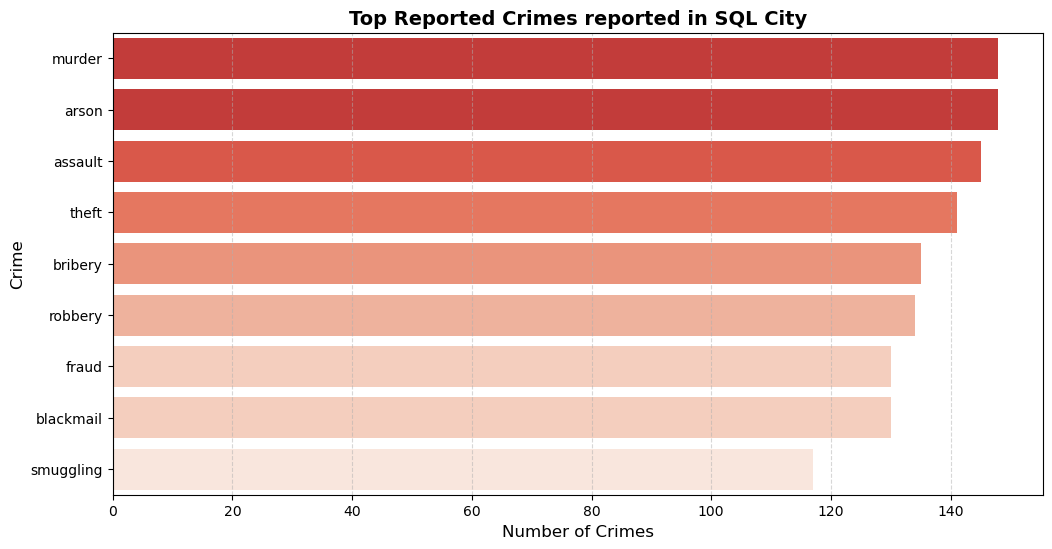

In [174]:
# Graph your results:
# Set the figure size
plt.figure(figsize=(12, 6))

# Create a color gradient using the "Reds" colormap (darkest = highest crime)
colors = sns.color_palette("Reds", len(top_crimes))

# Create the bar plot, from the top_crimes variable, define x and y axis the color will be based on the group of crimes not the number of crimes, remove the legends 
sns.barplot(
    data=top_crimes, 
    x="crime", 
    y="type", 
    hue="crime",
    palette=colors,
    legend=False
)

# Add labels and title
plt.xlabel("Number of Crimes", fontsize=12)
plt.ylabel("Crime", fontsize=12)
plt.title("Top Reported Crimes reported in SQL City", fontsize=14, fontweight="bold")

# Add grid for better readability
plt.grid(axis="x", linestyle="--", alpha=0.5)

# Show the plot
plt.show()

As highlighted in the bar chart, there are 2 crimes that have the highest rates in SQL city which are **murder and arson**. The officers would need to get extra training for both types of crimes as they have the same rate of occurance. 

Answer:

<b>Objective 2:</b> The town has also received more funding to encourage DOUBLE overtime for officers in SQL City during the month with the highest crime rate through out the date range of the database. What month would you advise the town to encourage officer overtime?

In [49]:
#create a dataframe to store the crime scene report from the engine datebase 
#see the format for date 
df = pd.read_sql("SELECT * FROM crime_scene_report;", engine)
print(df)

          date     type                                        description  \
0     20180115  robbery  A Man Dressed as Spider-Man Is on a Robbery Spree   
1     20180115   murder                  Life? Dont talk to me about life.   
2     20180115   murder  Mama, I killed a man, put a gun against his he...   
3     20180215   murder                         REDACTED REDACTED REDACTED   
4     20180215   murder  Someone killed the guard! He took an arrow to ...   
...        ...      ...                                                ...   
1223  20180430  bribery                                                 \n   
1224  20180430    fraud                  ‘Why not?’ said the March Hare.\n   
1225  20180430  assault                                                 \n   
1226  20180501  assault  be NO mistake about it: it was neither more no...   
1227  20180115   murder  Security footage shows that there were 2 witne...   

              city  
0              NYC  
1           Albany  


In [176]:
#make a connection to the database using the engine
with engine.connect() as connection:
    #defining the query  in the date column take the month numbers from the 5th number and 2 digits, count the number of times for each month and group them descedning order 
    query = text("""SELECT SUBSTRING(date, 5, 2) AS month,
                        COUNT(*) AS crime_count
                    FROM crime_scene_report 
                    GROUP BY month
                    ORDER BY crime_count DESC;
                """)
 #perform the query and store them in a pandas dataframe
    top_crime_months = pd.read_sql(query, connection)
top_crime_months

,month,crime_count
0,01,179
1,04,159
2,03,147
3,02,134
4,06,89
5,11,88
6,09,85
7,10,75
8,05,74
9,12,71


Officer overtime should be encouraged in **Janurary** as most crimes have occured in this month. 

Answer:

<b>Objective 3:</b> To thank the officers for their extra training and overtime, the town will pay for their monthly gym membership. They want to give the officers the membership that the least amount of civilians have to avoid being recognized daily as the town heros. The membership can be used in any town. What membership does the town give them?

In [107]:
#create a dataframe to store the get fir now member from the engine datebase 
df = pd.read_sql("SELECT * FROM get_fit_now_member;", engine)
print(df)

        id  person_id                name  membership_start_date  \
0    NL318      65076     Everette Koepke               20170926   
1    AOE21      39426        Noe Locascio               20171005   
2    2PN28      63823  Jeromy Heitschmidt               20180215   
3    0YJ24      80651      Waneta Wellard               20171206   
4    3A08L      32858        Mei Bianchin               20170401   
..     ...        ...                 ...                    ...   
179  2V137      41693      Wendell Dulany               20171219   
180  4KB72      79110          Emile Hege               20170522   
181  48Z7A      28819        Joe Germuska               20160305   
182  48Z55      67318       Jeremy Bowers               20160101   
183  90081      16371      Annabel Miller               20160208   

    membership_status  
0                gold  
1             regular  
2              silver  
3                gold  
4              silver  
..                ...  
179            

In [178]:
#make a connection to the database using the engine
with engine.connect() as connection:
    #define query to chose the membership_status column and count each from get fit now member table and group them by memeberships in ascending order 
    query = text("""SELECT membership_status, COUNT (*) as membership_count  -- count membership status 
                    FROM get_fit_now_member -- from the table 
                    GROUP BY membership_status -- group the results by the status types 
                    ORDER BY membership_count ASC;  -- put in descending order 
                """)
 #perform the query and store them in a pandas dataframe
    top_memberships = pd.read_sql(query, connection)
top_memberships

,membership_status,membership_count
0,regular,53
1,silver,63
2,gold,68


There are least registered memberships are regular. To reward the officers for their work they should give them the **regular membership** because the least amount of civilians have it and the officers won't get distubred while excersing. 

In [117]:
#Disconnect from the database. Always remember to disconnect :) 
connection.close() 